# Dataset Reperibili da Kaggle

## In questa lezione prenderemo un Dataset da Kaggle e dimostrare :
### - Dataset Originale :  Importarlo, Modificarlo, Grafici e Correlazioni Distribuzioni;
- 
### - Missing Values : Grafici;
- 
### - Outliers : Grafici;
- 
### - Splitting Dataset : Grafici;
-
### Scaling ed Encoding : Grafici.

Librerie usate :
#### - Pandas ( pd ) > [importare, manipolare e analizzare dati, consente di eseguire operazioni come la selezione, il filtraggio, il raggruppamento e il calcolo di statistiche basati su Dataframe, cioè "tabelle".];
-
#### - NumPy ( np ) > [consente di gestire grandi quantità di dati ed offre anche un'ampia gamma di funzioni matematiche e di algebra lineare per manipolare e analizzare questi dati in modo efficiente.];
-
#### - Matplotlib.pyplot ( plt ) > [creare grafici e visualizzare dei dati in modo semplice. E' possibile generare diversi tipi di grafici, come a linee, istogrammi e scatter plot. Si può personalizzare l'aspetto dei grafici, aggiungere titoli, etichette degli assi e colori.];
-
#### - Seaborn ( sns ) > [estensione di Matplotlib.pyplot che aggiunge qualche grafico e personalizzazione alla libreria];

In [3]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

## Iniziamo ad importare il nostro Dataset

In [4]:
df = pd.read_csv("onlinefoods.csv")
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


## Stampiamo i valori delle diverse Variabili

In [52]:
Age = df['Age'].value_counts()

Gender = df['Gender'].value_counts()

Marital_Status = df['Marital Status'].value_counts()

Occupation = df['Occupation'].value_counts()

Monthly_Income = df['Monthly Income'].value_counts()

Educational_Qualifications = df['Educational Qualifications'].value_counts()

#Family_Size = df['Family Size'].value_counts()

Feedback = df['Feedback'].value_counts()

print("Age","\n",Age,"\n\n")
print("Gender","\n",Gender,"\n\n")
print("Marital_Status","\n",Marital_Status,"\n\n")
print("Occupation","\n",Occupation,"\n\n")
print("Monthly_Income","\n",Monthly_Income,"\n\n")
print("Educational_Qualifications","\n",Educational_Qualifications,"\n\n")
#print("Family_Size","\n",Family_Size,"\n\n")
print("Feedback","\n",Feedback,"\n\n")

Age 
 23    73
22    57
25    52
24    50
26    35
21    23
27    21
32    16
28    15
29    14
20     9
30     9
31     8
19     4
18     1
33     1
Name: Age, dtype: int64 


Gender 
 Male      222
Female    166
Name: Gender, dtype: int64 


Marital_Status 
 Single               268
Married              108
Prefer not to say     12
Name: Marital Status, dtype: int64 


Occupation 
 Student           207
Employee          118
Self Employeed     54
House wife          9
Name: Occupation, dtype: int64 


Monthly_Income 
 No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: Monthly Income, dtype: int64 


Educational_Qualifications 
 Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: Educational Qualifications, dtype: int64 


Feedback 
 Positive     317
Negative      71
Name: Feedback, dtype: int64 




### Cerchiamo quanti Missing Values ci sono in questo dataframe 

In [90]:
percentage_missing = df.isnull().sum() * 100 / len(df)
print(percentage_missing)

#Percentuale Missing Values

Age                           0.0
Gender                        0.0
Marital Status                0.0
Occupation                    0.0
Monthly Income                0.0
Educational Qualifications    0.0
Family size                   0.0
latitude                      0.0
longitude                     0.0
Pin code                      0.0
Output                        0.0
Feedback                      0.0
Unnamed: 12                   0.0
dtype: float64


# Missing Values e Modifica Dataset

### Non sembrerrebero esserci Dati Mancanti però generiamoli ed inseriamoli per il lavoro Missing Values

In [56]:
#Copiamo il Dataframe per non modificarlo
df_missing = df.copy()

np.random.seed(0)  # Imposta un seed per la riproducibilità
mask = np.random.rand(*df.shape) < 0.1  # Genera una maschera booleana con probabilità del 10%
df_missing[mask] = np.nan  # Sostituisci con NaN dove la maschera è True

percentage_missing_copy = df_missing.isnull().sum() * 100 / len(df)

print("Percentuale di missing values nella copia:","\n\n", percentage_missing_copy)

Percentuale di missing values nella copia: 

 Age                            8.505155
Gender                        10.309278
Marital Status                 9.536082
Occupation                    11.082474
Monthly Income                12.628866
Educational Qualifications     6.701031
Family size                    6.701031
latitude                       9.020619
longitude                     11.082474
Pin code                      10.051546
Output                        12.886598
Feedback                       8.247423
Unnamed: 12                   11.082474
dtype: float64


### Vediamo quali e dove sono queste righe con i Dati Mancanti generati e vediamo quanti in totale

In [59]:
righe_con_dati_mancanti = df_missing[df_missing.isnull().any(axis=1)]
totale_dati_mancanti = righe_con_dati_mancanti.shape[0]

print(righe_con_dati_mancanti)
print("\n","Totale dei dati mancanti: ",totale_dati_mancanti)

      Age  Gender Marital Status Occupation  Monthly Income  \
1    24.0     NaN            NaN        NaN  Below Rs.10000   
2    22.0    Male         Single    Student  Below Rs.10000   
3    22.0  Female         Single    Student             NaN   
5    27.0  Female            NaN   Employee             NaN   
6    22.0    Male         Single    Student             NaN   
..    ...     ...            ...        ...             ...   
382  24.0  Female            NaN    Student       No Income   
383  23.0  Female         Single    Student       No Income   
384  23.0  Female         Single    Student       No Income   
386  23.0    Male         Single    Student             NaN   
387  23.0    Male         Single    Student       No Income   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
1                     Graduate          3.0   12.9770    77.5773  560009.0   
2                Post Graduate          3.0   12.9551        NaN  560017.0   
3        

### Creiamo i nostri grafici per identificare quanti e dove sono questi Missing Values Inseriti

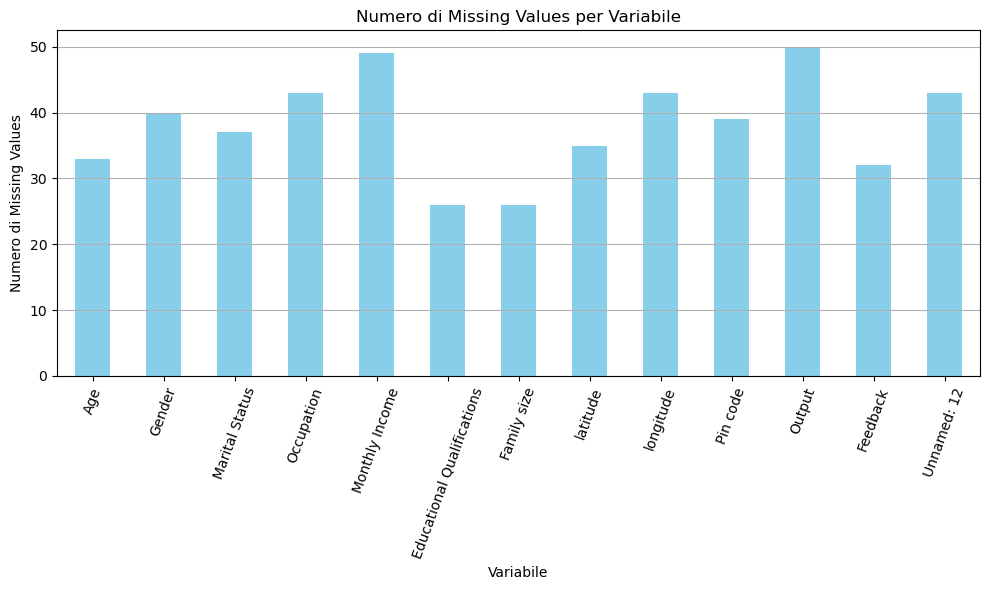

In [72]:
# Calcola il numero di missing values per ogni variabile
missing_values_count = df_missing.isnull().sum()

# Crea il grafico a barre
plt.figure(figsize=(10, 6))
missing_values_count.plot(kind='bar', color='skyblue')
plt.title('Numero di Missing Values per Variabile')
plt.xlabel('Variabile')
plt.ylabel('Numero di Missing Values')
plt.xticks(rotation=70)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

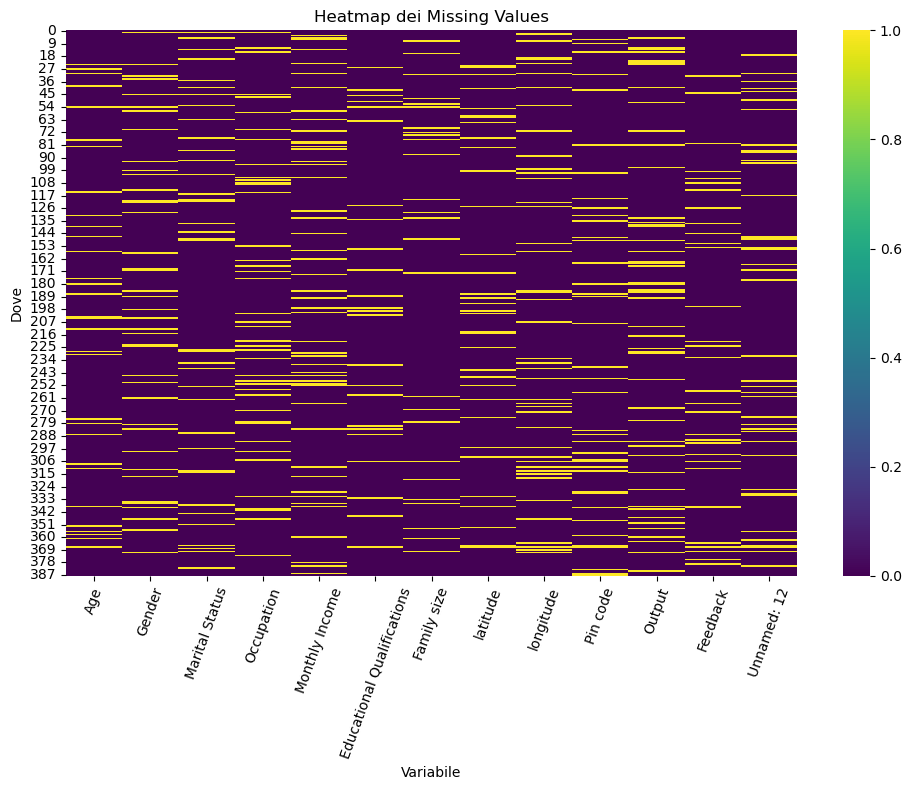

In [83]:
# Calcola una maschera booleana indicando i valori mancanti nel DataFrame
missing_values_mask = df_missing.isnull()

# Crea la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(missing_values_mask, cmap='viridis', cbar=True)
plt.title('Heatmap dei Missing Values')
plt.xlabel('Variabile')
plt.ylabel('Dove')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

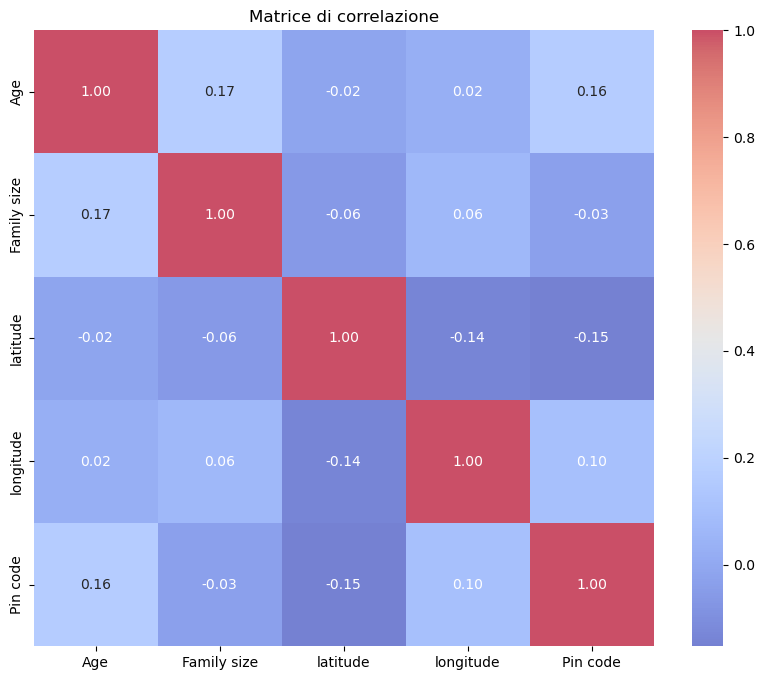

In [94]:
# Calcola la matrice di correlazione tra le variabili numeriche del DataFrame
correlation_matrix = df_missing.corr(numeric_only=True)

# Visualizza la matrice di correlazione come heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", alpha=0.7)

plt.title('Matrice di correlazione')
plt.show()

### Togliamo questi dati mancanti e finiamo con loro

In [61]:
df_missing_no=df_missing.dropna(inplace=False)
df_missing_no

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20.0,Female,Single,Student,No Income,Post Graduate,4.0,12.9766,77.5993,560001.0,Yes,Positive,Yes
4,22.0,Male,Single,Student,Below Rs.10000,Post Graduate,4.0,12.9850,77.5533,560010.0,Yes,Positive,Yes
8,23.0,Female,Single,Student,No Income,Post Graduate,2.0,12.9766,77.5993,560001.0,Yes,Positive,Yes
10,22.0,Female,Single,Student,No Income,Post Graduate,5.0,12.9850,77.5533,560010.0,Yes,Positive,Yes
11,23.0,Male,Single,Student,Below Rs.10000,Post Graduate,2.0,12.9770,77.5773,560009.0,Yes,Negative,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,23.0,Female,Single,Student,No Income,Post Graduate,2.0,13.0158,77.5390,560096.0,Yes,Positive,Yes
374,21.0,Male,Single,Student,No Income,Graduate,3.0,13.0641,77.5931,560092.0,Yes,Negative,Yes
375,26.0,Female,Married,Employee,Below Rs.10000,Graduate,6.0,12.9859,77.6713,560093.0,No,Negative,No
377,31.0,Male,Prefer not to say,Employee,Below Rs.10000,Graduate,1.0,12.9866,77.4904,560091.0,No,Negative,No


# Distribuzione di ogni Variabile all'interno del Dataset

# Frequenza 

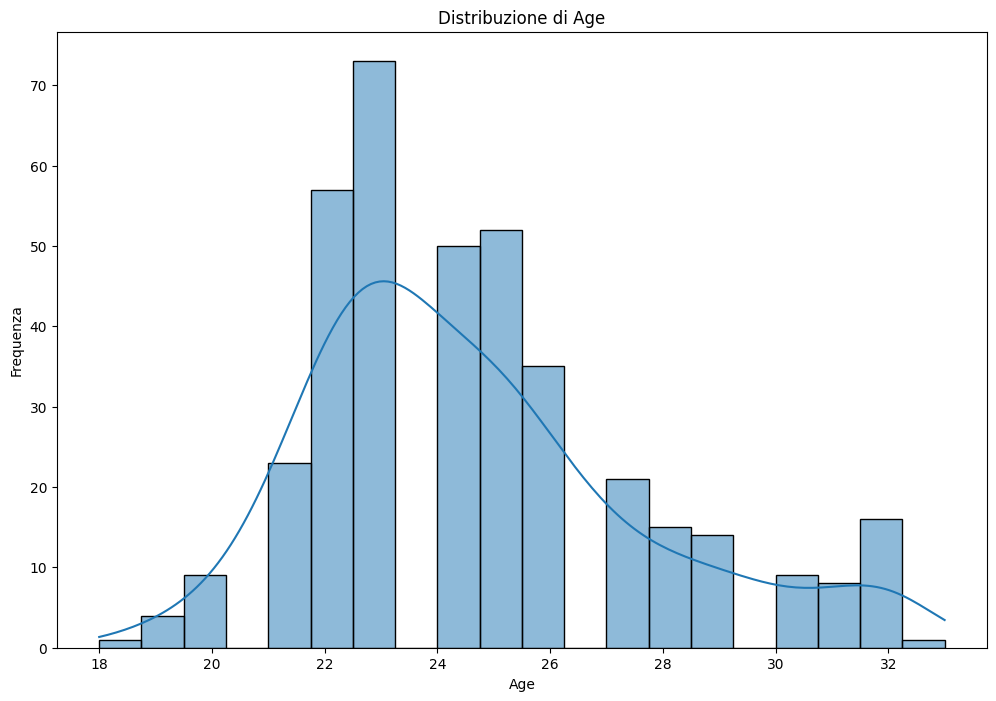

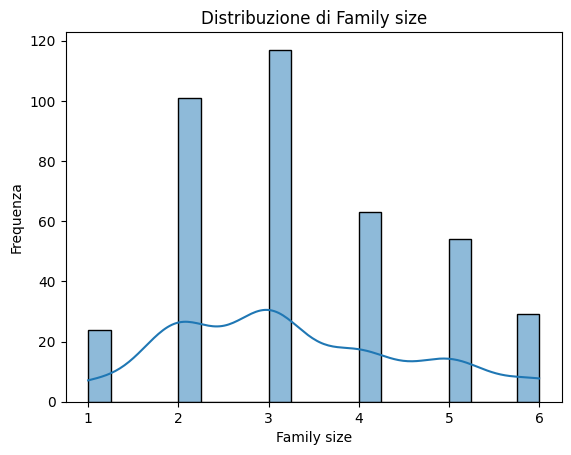

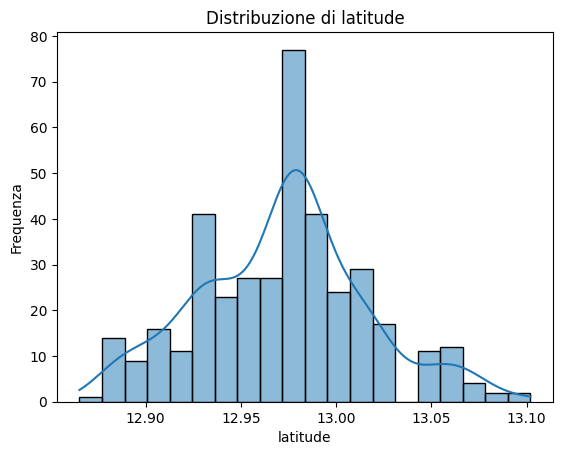

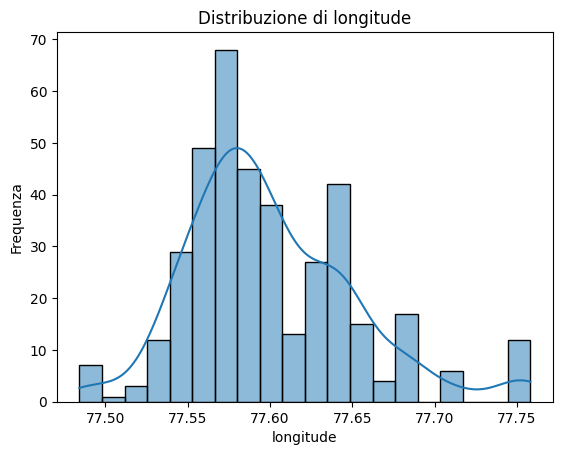

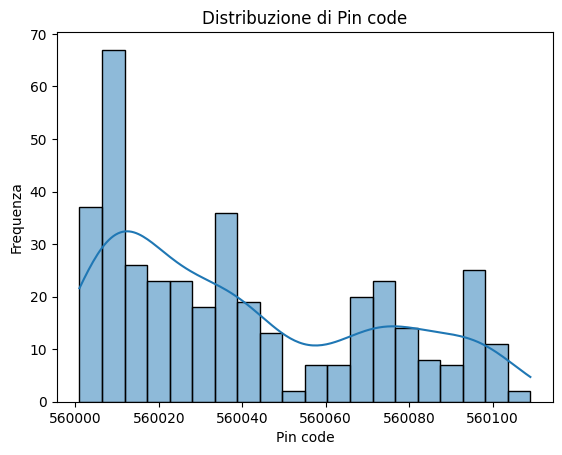

In [5]:
# Assume che il tuo nuovo DataFrame sia già definito come df2_cleaned
df1 = df
# Seleziona solo le colonne numeriche
numeric_columns = df1.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 8))
for col in numeric_columns.columns:
    sns.histplot(data=df1, x=col, kde=True, bins=20)
    plt.title(f'Distribuzione di {col}')
    plt.xlabel(col)
    plt.ylabel('Frequenza')
    plt.show()

# Conteggio

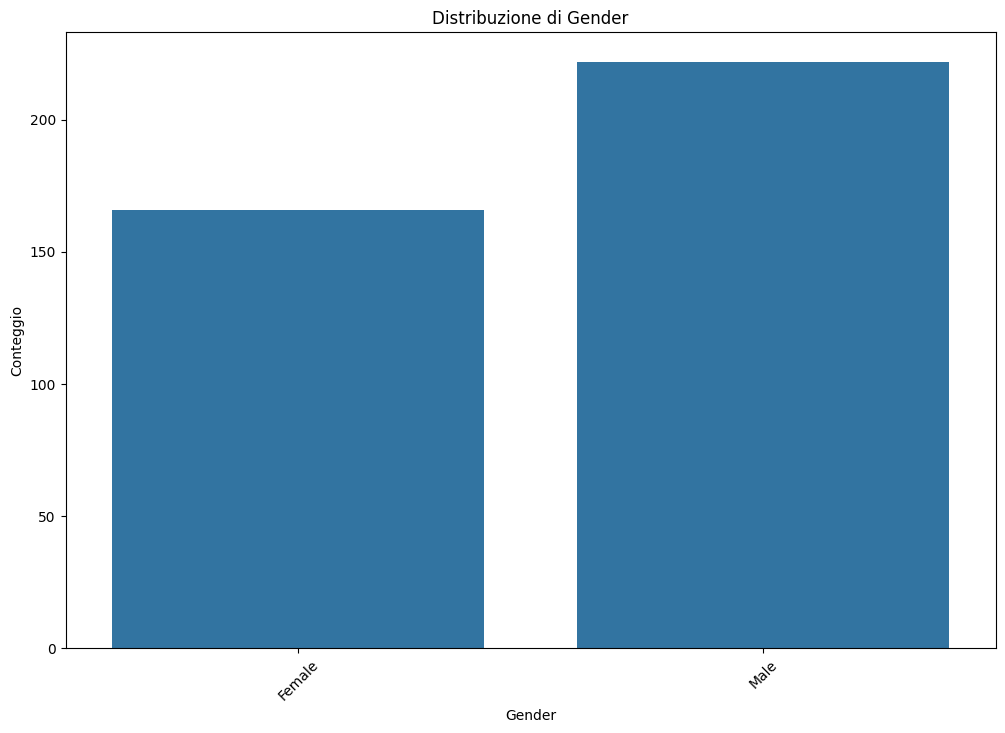

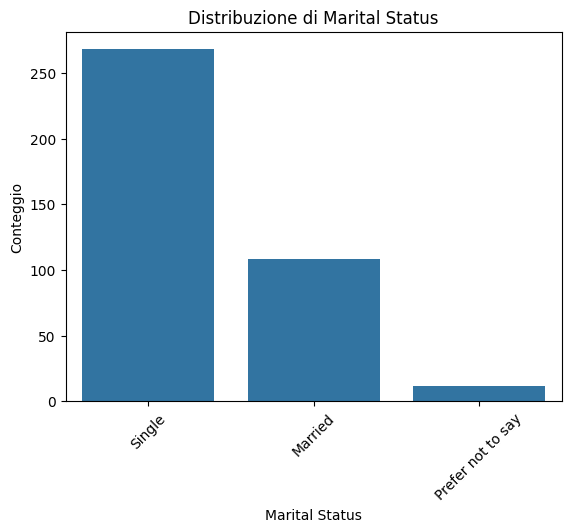

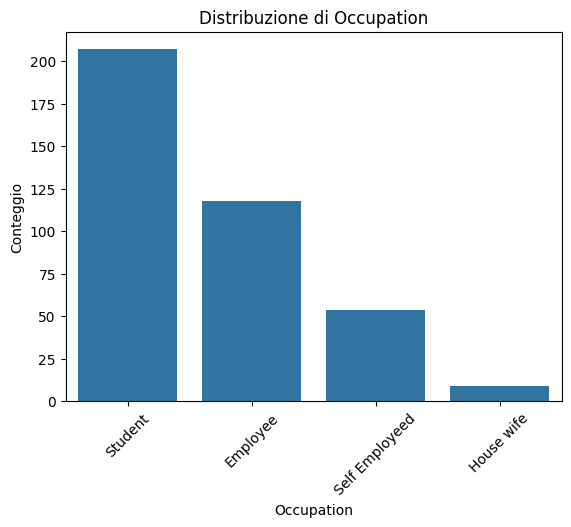

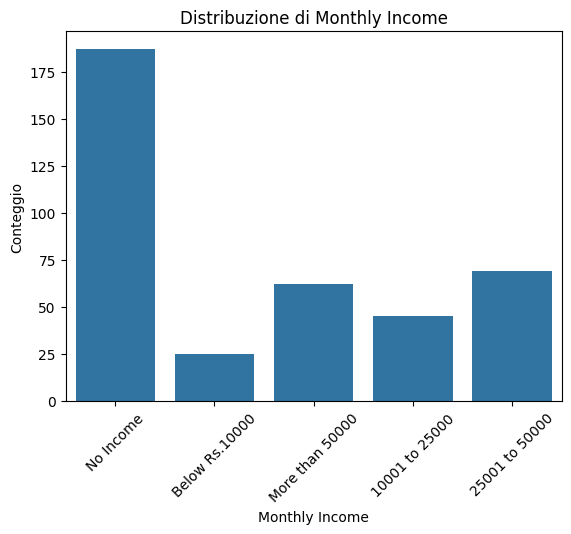

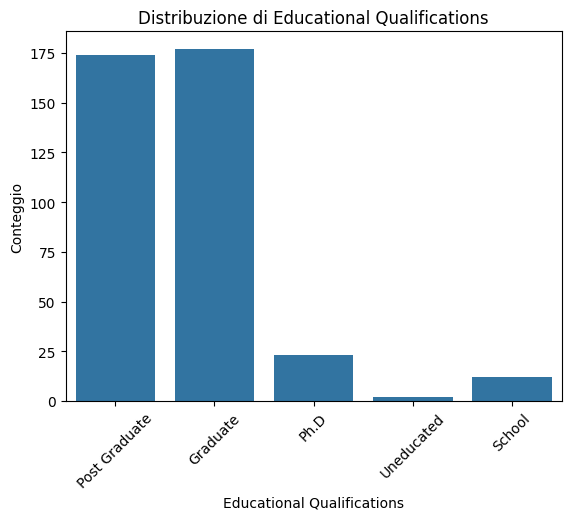

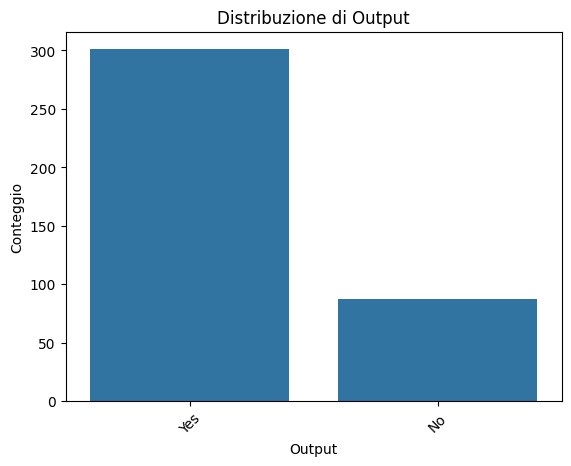

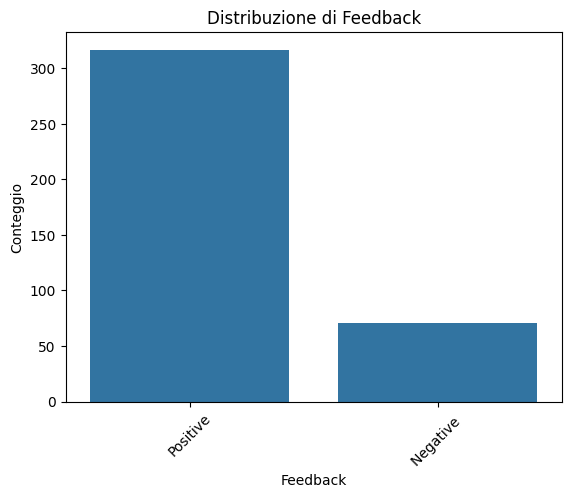

In [8]:
# Seleziona solo le colonne categoriche
categorical_columns = df1.select_dtypes(include=['object'])

plt.figure(figsize=(12, 8))
for col in categorical_columns.columns:
    sns.countplot(data=df1, x=col)
    plt.title(f'Distribuzione di {col}')
    plt.xlabel(col)
    plt.ylabel('Conteggio')
    plt.xticks(rotation=45)
    plt.show()

# Outliers

### Calcoliamo gli Outliers, Media e Deviazione Standard di ogni singola Variabile

In [95]:
# Calcola la media e gli outlier per tutte le variabili nel DataFrame
outliers_dict = {}
mean_dict = {}

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Verifica se la colonna è numerica
        mean_value = df[col].mean()
        std_dev = df[col].std()
        
        # Identifica gli outliers considerando ±3 sigma dalla media
        outliers = df[(df[col] > mean_value + 3 * std_dev) | (df[col] < mean_value - 3 * std_dev)]
        
        outliers_dict[col] = outliers
        mean_dict[col] = mean_value

# Stampa gli outlier per ogni variabile
for col, outliers in outliers_dict.items():
    print(f"Outliers per '{col}':")
    print(outliers)
    print("\n")

# Stampa la media per ogni variabile
for col, mean_value in mean_dict.items():
    print(f"Media per '{col}': {mean_value}")


Outliers per 'Age':
Empty DataFrame
Columns: [Age, Gender, Marital Status, Occupation, Monthly Income, Educational Qualifications, Family size, latitude, longitude, Pin code, Output, Feedback, Unnamed: 12]
Index: []


Outliers per 'Family size':
Empty DataFrame
Columns: [Age, Gender, Marital Status, Occupation, Monthly Income, Educational Qualifications, Family size, latitude, longitude, Pin code, Output, Feedback, Unnamed: 12]
Index: []


Outliers per 'latitude':
Empty DataFrame
Columns: [Age, Gender, Marital Status, Occupation, Monthly Income, Educational Qualifications, Family size, latitude, longitude, Pin code, Output, Feedback, Unnamed: 12]
Index: []


Outliers per 'longitude':
     Age  Gender Marital Status      Occupation   Monthly Income  \
258   23    Male         Single         Student        No Income   
259   28  Female        Married        Employee   25001 to 50000   
260   30    Male        Married  Self Employeed  More than 50000   
267   25  Female         Single    

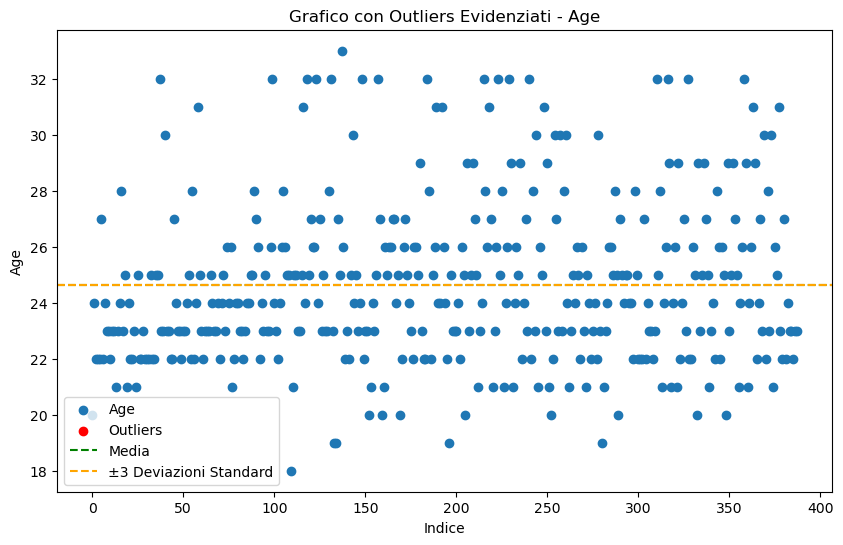

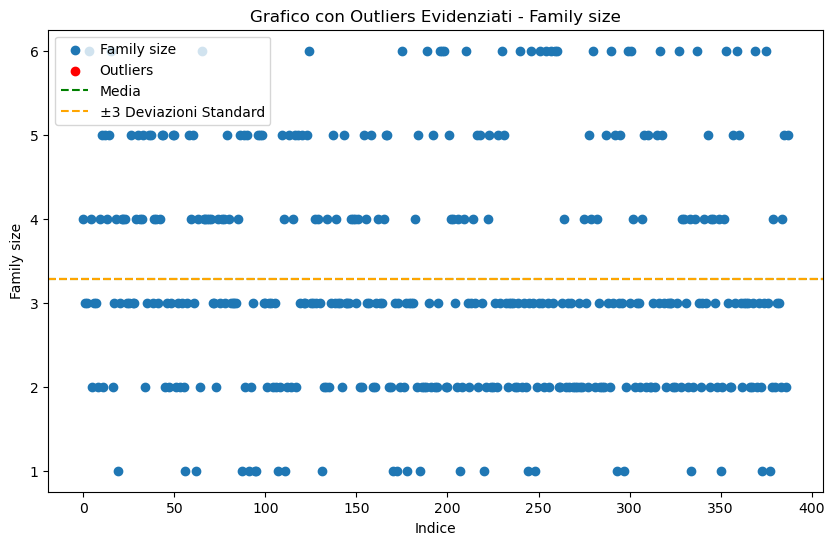

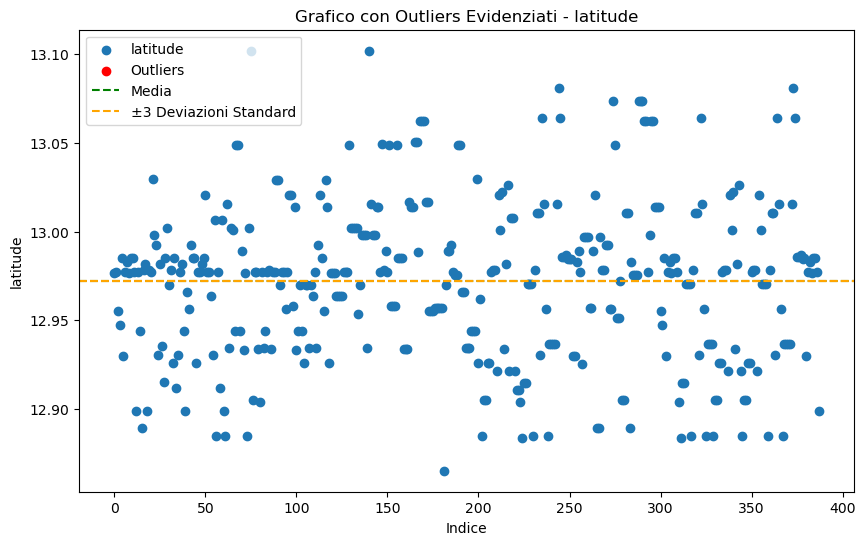

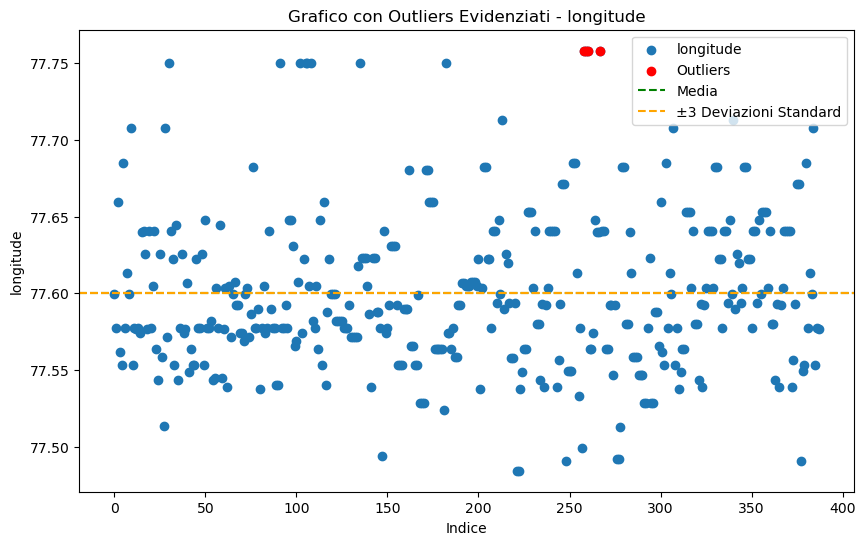

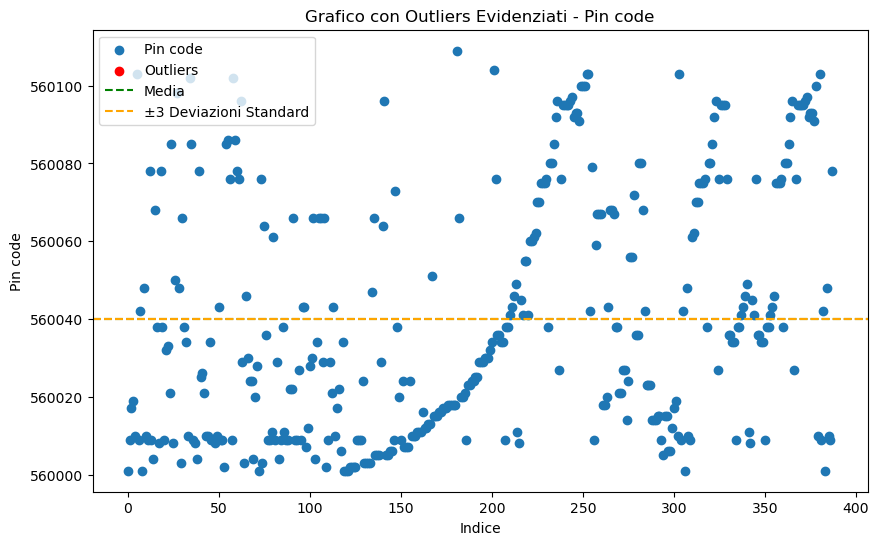

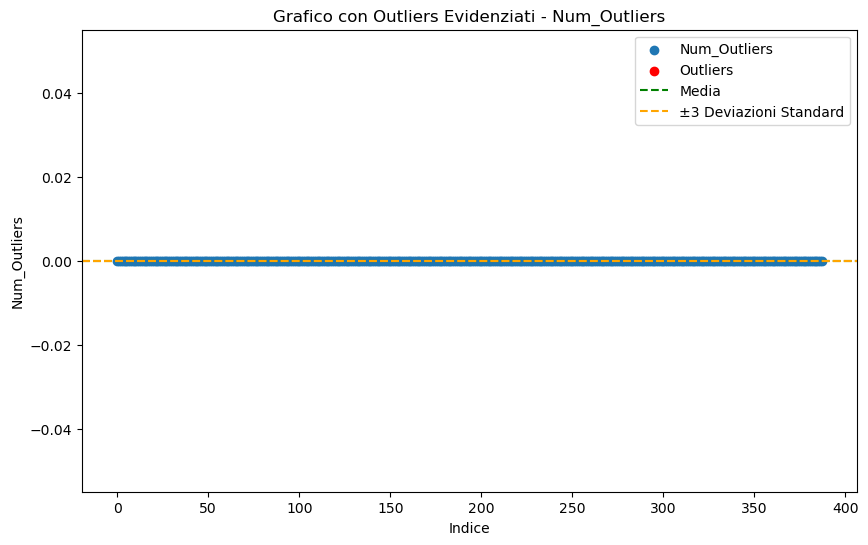

In [100]:
# Calcola la media e gli outlier per tutte le variabili nel DataFrame
outliers_dict = {}
mean_dict = {}

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Verifica se la colonna è numerica
        mean_value = df[col].mean()
        std_dev = df[col].std()
        outliers = df[(df[col] > mean_value + 3 * std_dev) | (df[col] < mean_value - 3 * std_dev)]
        
        outliers_dict[col] = outliers
        mean_dict[col] = mean_value

# Crea un grafico a dispersione per ogni variabile nel DataFrame
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:  # Verifica se la colonna è numerica
        plt.figure(figsize=(10, 6))
        plt.scatter(df.index, df[col], label=col)  # Crea il grafico a dispersione
        
        # Evidenzia gli outlier nel grafico con un colore diverso
        outliers = outliers_dict.get(col, pd.DataFrame())  # Ottieni gli outlier per questa variabile
        plt.scatter(outliers.index, outliers[col], color='red', label='Outliers')
        
        # Aggiungi la media e le deviazioni standard al grafico
        plt.axhline(y=mean_dict[col], color='green', linestyle='--', label='Media')
        plt.axhline(y=mean_dict[col] + 3 * std_dev, color='orange', linestyle='--', label='±3 Deviazioni Standard')
        plt.axhline(y=mean_dict[col] - 3 * std_dev, color='orange', linestyle='--')
        
        # Aggiungi etichette e legenda al grafico
        plt.xlabel('Indice')
        plt.ylabel(col)
        plt.title(f'Grafico con Outliers Evidenziati - {col}')
        plt.legend()
        
        # Mostra il grafico
        plt.show()

In [111]:
df_outlier = df.copy()

df_outlier['Is_Outlier'] = df.index.isin(outliers.index)

df_filtered = df_outlier[df_outlier['Is_Outlier'] == False]
df_filtered

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12,Num_Outliers,Is_Outlier
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes,0.0,False
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes,0.0,False
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes,0.0,False
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes,0.0,False
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes,0.0,False
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes,0.0,False
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes,0.0,False
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes,0.0,False


In [113]:
# Copia il DataFrame originale
df_outlier_no = df.copy()

# Calcola la media e gli outlier per tutte le variabili nel DataFrame
outliers_dict = {}
mean_dict = {}

for col in df_cleaned.columns:
    if df_outlier_no[col].dtype in ['int64', 'float64']:  # Verifica se la colonna è numerica
        mean_value = df_outlier_no[col].mean()
        std_dev = df_outlier_no[col].std()
        
        # Identifica gli outliers considerando ±3 sigma dalla media
        outliers = df_outlier_no[(df_cleaned[col] > mean_value + 3 * std_dev) | (df_outlier_no[col] < mean_value - 3 * std_dev)]
        
        outliers_dict[col] = outliers
        mean_dict[col] = mean_value

# Rimuovi gli outlier dal DataFrame copiato
for col, outliers in outliers_dict.items():
    df_outlier_no = df_outlier_no.drop(outliers.index)

# Stampa il DataFrame senza i dati outlier
print(df_outlier_no)


     Age  Gender Marital Status Occupation  Monthly Income  \
0     20  Female         Single    Student       No Income   
1     24  Female         Single    Student  Below Rs.10000   
2     22    Male         Single    Student  Below Rs.10000   
3     22  Female         Single    Student       No Income   
4     22    Male         Single    Student  Below Rs.10000   
..   ...     ...            ...        ...             ...   
383   23  Female         Single    Student       No Income   
384   23  Female         Single    Student       No Income   
385   22  Female         Single    Student       No Income   
386   23    Male         Single    Student  Below Rs.10000   
387   23    Male         Single    Student       No Income   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                Post Graduate            4   12.9766    77.5993    560001   
1                     Graduate            3   12.9770    77.5773    560009   
2                Post

# Splitting Dataset

In [7]:
import pandas as pd

# Carica il dataset
df = pd.read_csv('onlinefoods.csv')

# Seleziona colonne categoriche
categorical_columns = df.select_dtypes(include=['object'])

# Seleziona colonne numeriche
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Stampa le prime righe di entrambi i DataFrame
print("Colonne Categoriche:")
print(categorical_columns.head())

print("\nColonne Numeriche:")
print(numeric_columns.head())

Colonne Categoriche:
   Gender Marital Status Occupation  Monthly Income  \
0  Female         Single    Student       No Income   
1  Female         Single    Student  Below Rs.10000   
2    Male         Single    Student  Below Rs.10000   
3  Female         Single    Student       No Income   
4    Male         Single    Student  Below Rs.10000   

  Educational Qualifications Output   Feedback Unnamed: 12  
0              Post Graduate    Yes   Positive         Yes  
1                   Graduate    Yes   Positive         Yes  
2              Post Graduate    Yes  Negative          Yes  
3                   Graduate    Yes   Positive         Yes  
4              Post Graduate    Yes   Positive         Yes  

Colonne Numeriche:
   Age  Family size  latitude  longitude  Pin code
0   20            4   12.9766    77.5993    560001
1   24            3   12.9770    77.5773    560009
2   22            3   12.9551    77.6593    560017
3   22            6   12.9473    77.5616    560019
4   22 

# Train Set e Test Set con aggiunta di questo Splitting Values

In [12]:
# Supponiamo che il DataFrame originale si chiami df e contenga tutte le colonne come descritto
# Supponiamo che 'Age' sia presente nel DataFrame

# Definiamo le variabili X e y
X = df.drop(columns=['Output', 'Feedback'])  # Escludiamo 'Output' e 'Feedback' da X
y = df['Output']  # La variabile dipendente è 'Output'

# suddividere il dataset in training set (70%) e test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# stampare le dimensioni dei traning set e test set
print("Dimensioni del training set:", X_train.shape, y_train.shape)
print("Dimensioni del test set:", X_test.shape, y_test.shape)


Dimensioni del training set: (271, 11) (271,)
Dimensioni del test set: (117, 11) (117,)


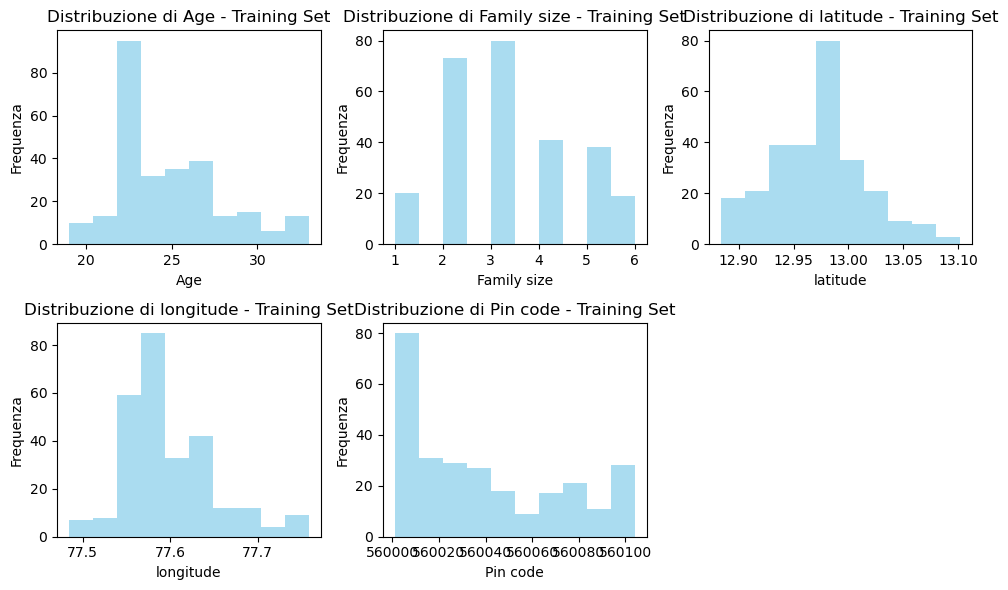

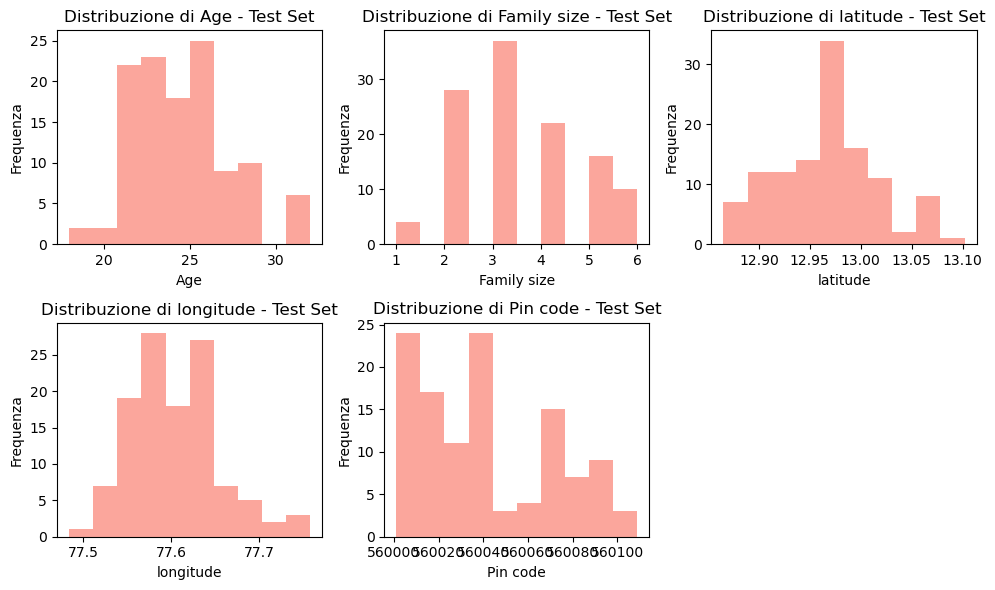

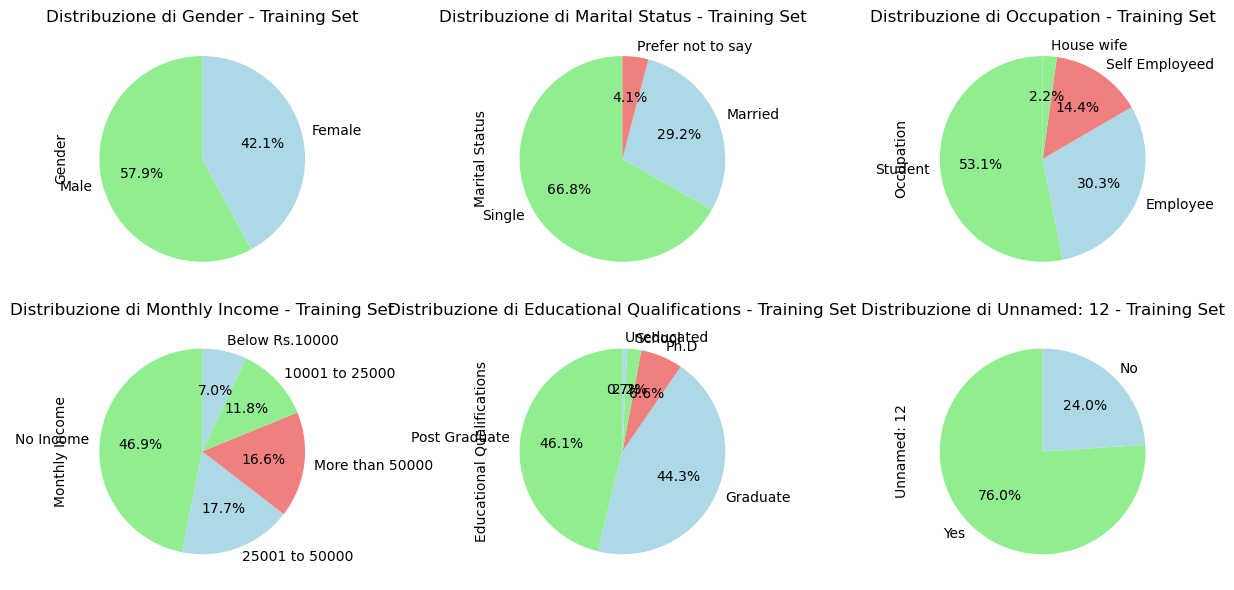

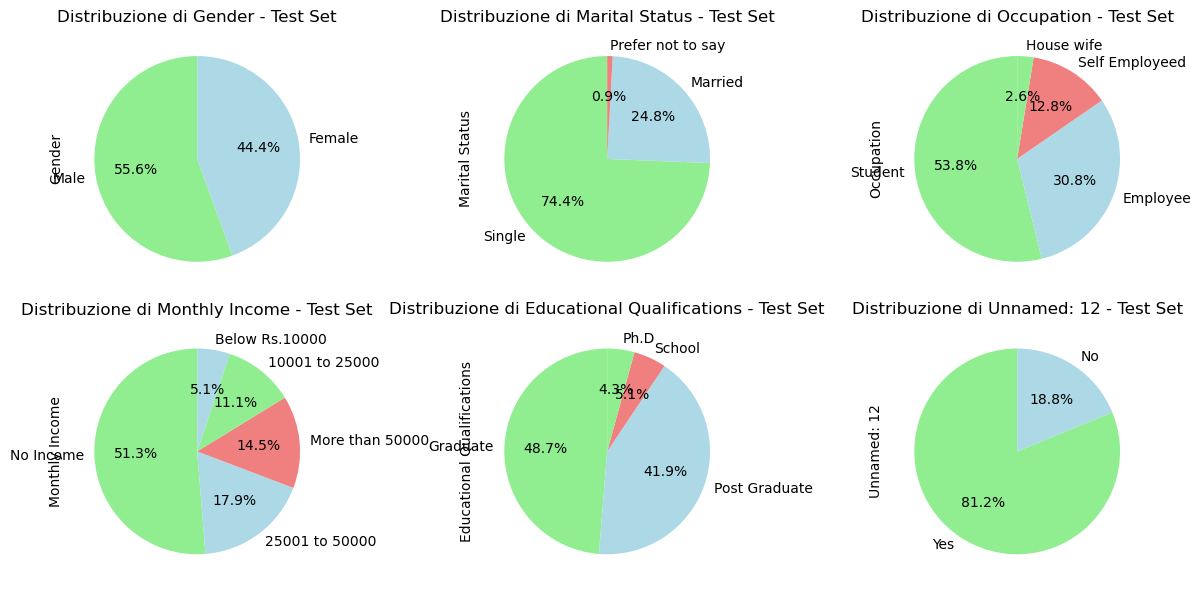

In [15]:
import matplotlib.pyplot as plt

# Grafico per il training set (variabili numeriche)
plt.figure(figsize=(10, 6))  # Imposta la dimensione della figura
for i, col in enumerate(X_train.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(2, 3, i + 1)  # Crea un sotto-plot all'interno della figura
    plt.hist(X_train[col], bins=10, color='skyblue', alpha=0.7)  # Crea un istogramma per la variabile numerica
    plt.title(f'Distribuzione di {col} - Training Set')  # Imposta il titolo del subplot
    plt.xlabel(col)  # Etichetta dell'asse x
    plt.ylabel('Frequenza')  # Etichetta dell'asse y
plt.tight_layout()  # Ottimizza il layout dei subplot per evitare sovrapposizioni
plt.show()  # Mostra il grafico

# Grafico per il test set (variabili numeriche)
plt.figure(figsize=(10, 6))  # Imposta la dimensione della figura
for i, col in enumerate(X_test.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(2, 3, i + 1)  # Crea un sotto-plot all'interno della figura
    plt.hist(X_test[col], bins=10, color='salmon', alpha=0.7)  # Crea un istogramma per la variabile numerica
    plt.title(f'Distribuzione di {col} - Test Set')  # Imposta il titolo del subplot
    plt.xlabel(col)  # Etichetta dell'asse x
    plt.ylabel('Frequenza')  # Etichetta dell'asse y
plt.tight_layout()  # Ottimizza il layout dei subplot per evitare sovrapposizioni
plt.show()  # Mostra il grafico

# Grafico per il training set (variabili categoriche)
plt.figure(figsize=(12, 6))  # Imposta la dimensione della figura
for i, col in enumerate(X_train.select_dtypes(include=['object']).columns):
    plt.subplot(2, 3, i + 1)  # Crea un sotto-plot all'interno della figura
    X_train[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightblue', 'lightcoral'])
    # Crea un grafico a torta per la variabile categorica
    plt.title(f'Distribuzione di {col} - Training Set')  # Imposta il titolo del subplot
plt.tight_layout()  # Ottimizza il layout dei subplot per evitare sovrapposizioni
plt.show()  # Mostra il grafico

# Grafico per il test set (variabili categoriche)
plt.figure(figsize=(12, 6))  # Imposta la dimensione della figura
for i, col in enumerate(X_test.select_dtypes(include=['object']).columns):
    plt.subplot(2, 3, i + 1)  # Crea un sotto-plot all'interno della figura
    X_test[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightblue', 'lightcoral'])
    # Crea un grafico a torta per la variabile categorica
    plt.title(f'Distribuzione di {col} - Test Set')  # Imposta il titolo del subplot
plt.tight_layout()  # Ottimizza il layout dei subplot per evitare sovrapposizioni
plt.show()  # Mostra il grafico


# Dataset con Encoding & Scaling 

In [9]:
from sklearn.preprocessing import StandardScaler

# Seleziona solo le colonne numeriche nel DataFrame
numeric_columns = df1.select_dtypes(include=['float64', 'int64'])

# Inizializza lo StandardScaler
scaler = StandardScaler()

# Applica lo scaling alle colonne numeriche
scaled_numeric_columns = scaler.fit_transform(numeric_columns)

# Crea un nuovo DataFrame con le colonne numeriche scalate
df2_scaled = pd.DataFrame(scaled_numeric_columns, columns=numeric_columns.columns)

# Visualizza il nuovo DataFrame scalato
df2_scaled

,Age,Family size,latitude,longitude,Pin code
0,-1.557620,0.532929,0.102224,-0.016759,-1.247274
1,-0.211614,-0.208205,0.111227,-0.445712,-0.992164
2,-0.884617,-0.208205,-0.381663,1.153112,-0.737055
3,-0.884617,2.015198,-0.557212,-0.751828,-0.673278
4,-0.884617,0.532929,0.291278,-0.913660,-0.960276
...,...,...,...,...,...
383,-0.548116,-0.949340,0.102224,-0.016759,-1.247274
384,-0.548116,0.532929,0.300280,2.104607,0.251493
385,-0.884617,1.274064,0.291278,-0.913660,-0.960276
386,-0.548116,-0.949340,0.111227,-0.445712,-0.992164


In [17]:
from sklearn.preprocessing import OneHotEncoder

# Seleziona solo le colonne categoriche nel DataFrame
categorical_columns = df1.select_dtypes(include=['object'])

# Inizializza OneHotEncoder
encoder = OneHotEncoder()

# Applica l'encoding alle colonne categoriche e trasforma i dati
encoded_categorical_columns = encoder.fit_transform(categorical_columns)

# Ottieni i nomi delle categorie dall'encoder
encoded_categories = encoder.categories_

# Crea i nomi delle nuove colonne dopo l'encoding
encoded_column_names = []
for i, col in enumerate(categorical_columns.columns):
    encoded_column_names.extend([f"{col}_{category}" for category in encoded_categories[i]])

df2_encoded = pd.DataFrame(encoded_categorical_columns.toarray(), columns=encoded_column_names)

print(df2_encoded)

     Gender_Female  Gender_Male  Marital Status_Married  \
0              1.0          0.0                     0.0   
1              1.0          0.0                     0.0   
2              0.0          1.0                     0.0   
3              1.0          0.0                     0.0   
4              0.0          1.0                     0.0   
..             ...          ...                     ...   
383            1.0          0.0                     0.0   
384            1.0          0.0                     0.0   
385            1.0          0.0                     0.0   
386            0.0          1.0                     0.0   
387            0.0          1.0                     0.0   

     Marital Status_Prefer not to say  Marital Status_Single  \
0                                 0.0                    1.0   
1                                 0.0                    1.0   
2                                 0.0                    1.0   
3                                 0

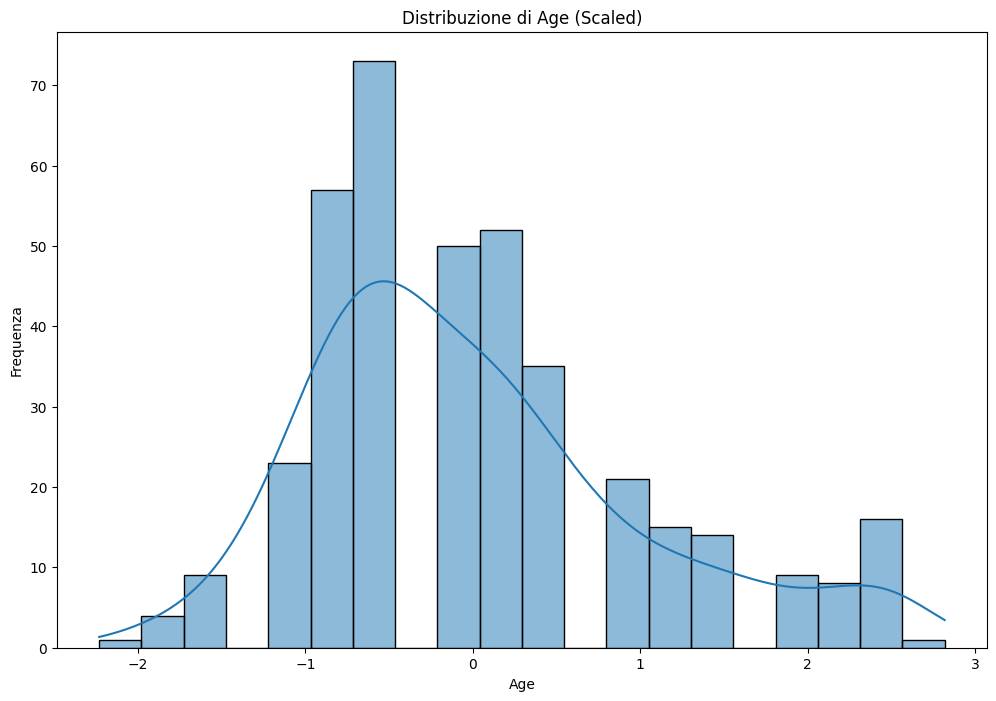

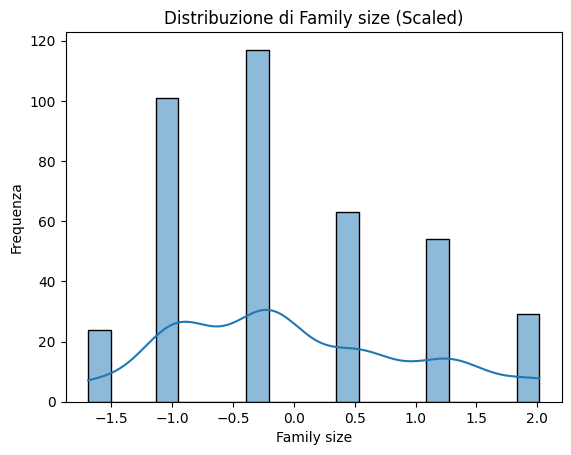

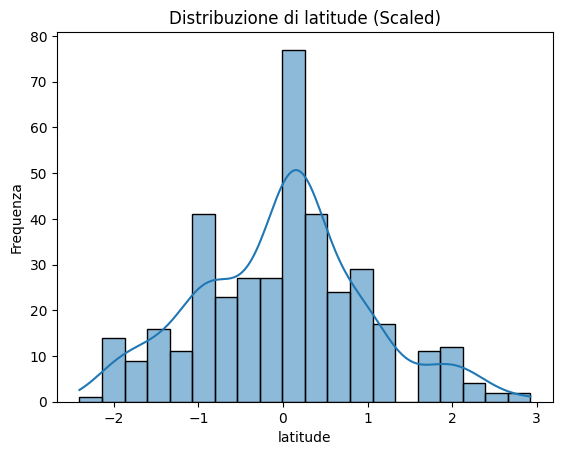

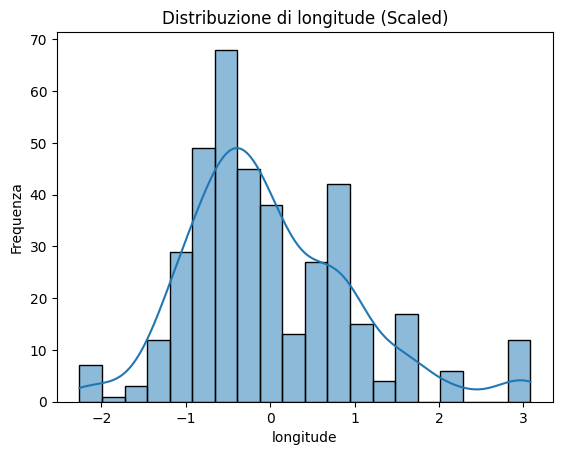

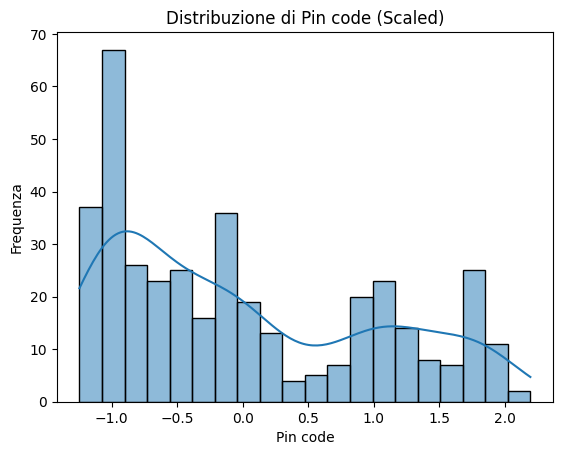

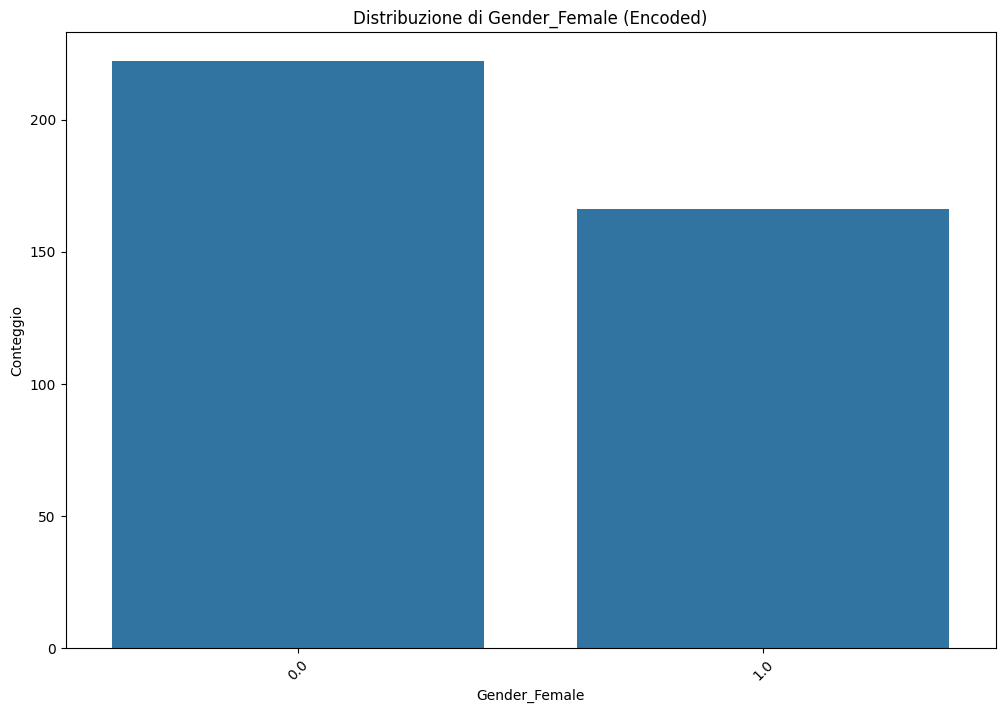

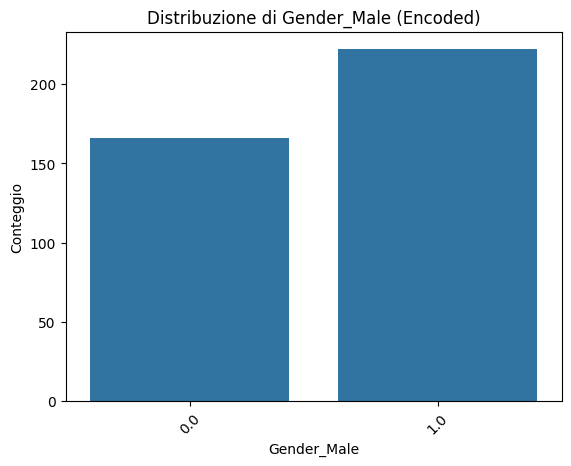

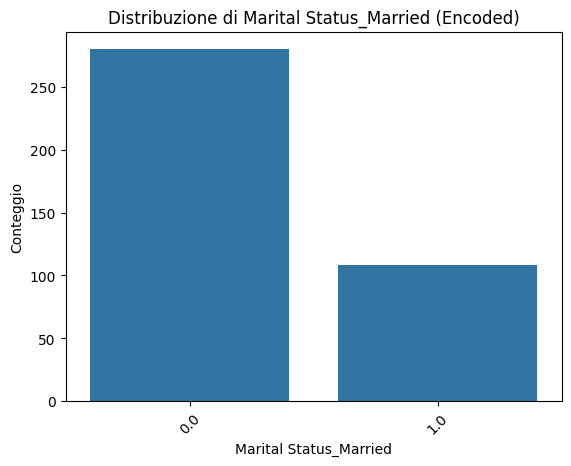

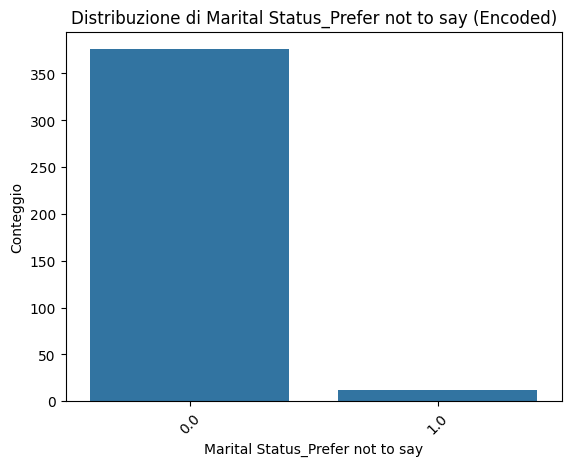

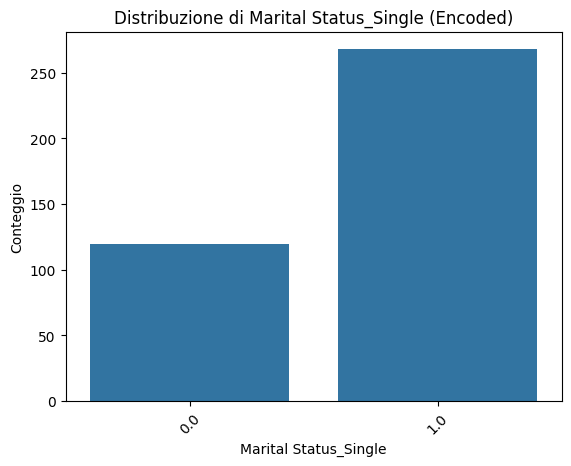

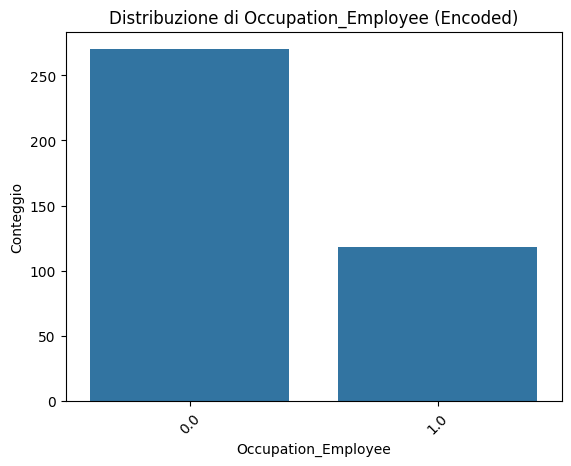

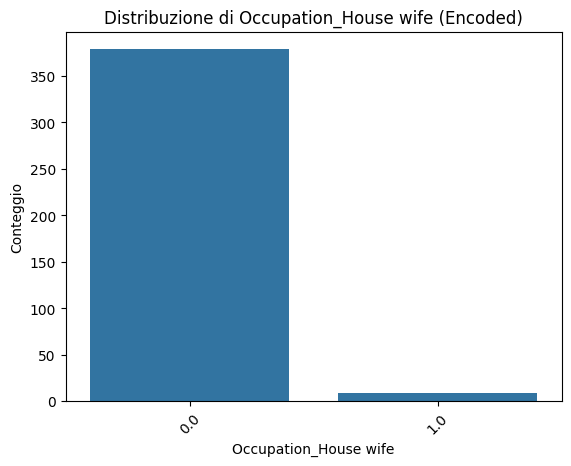

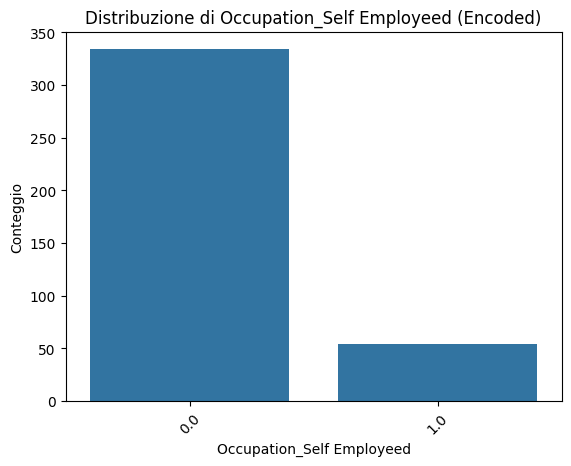

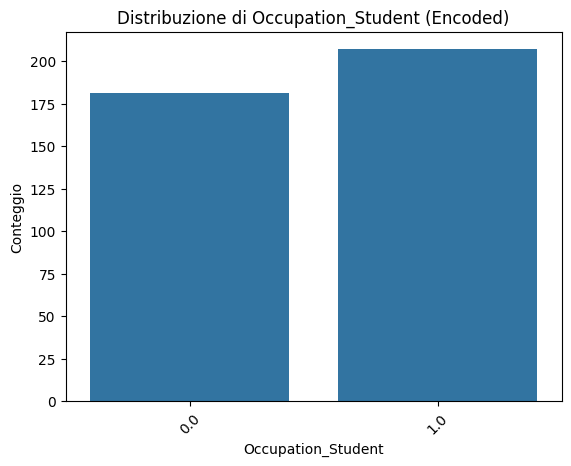

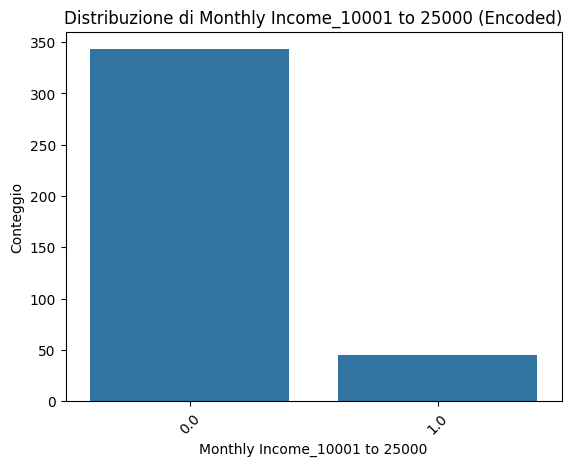

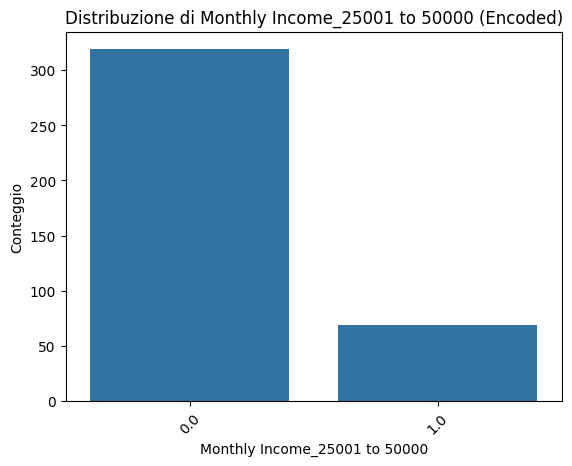

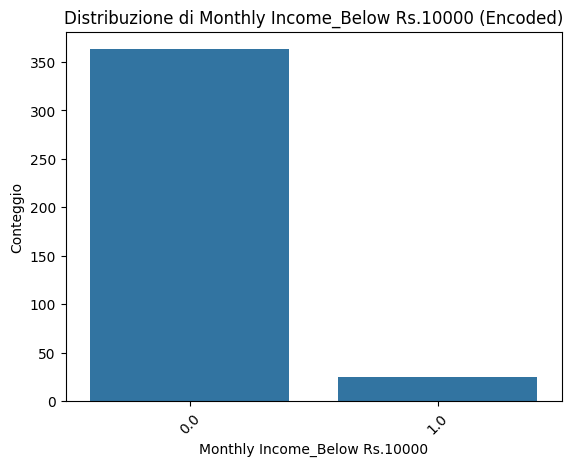

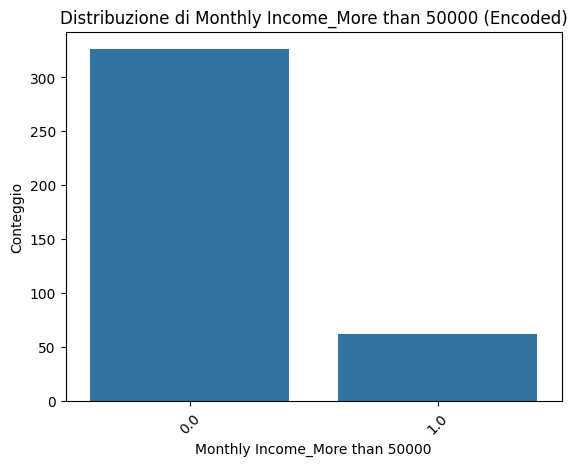

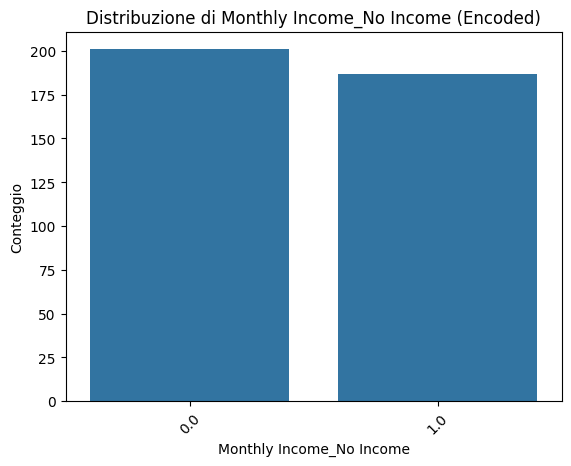

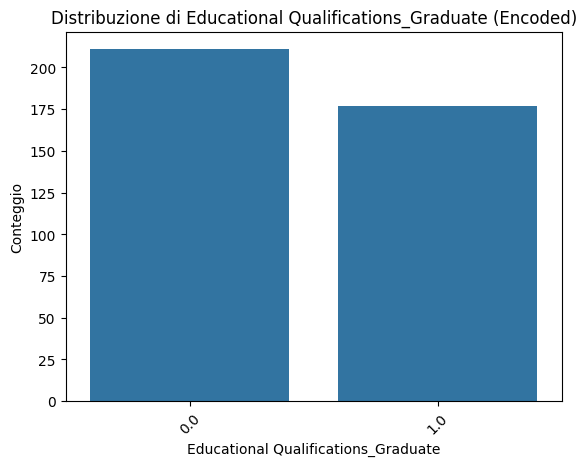

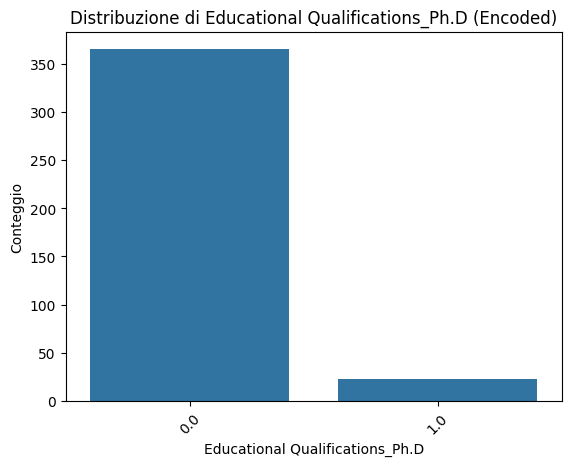

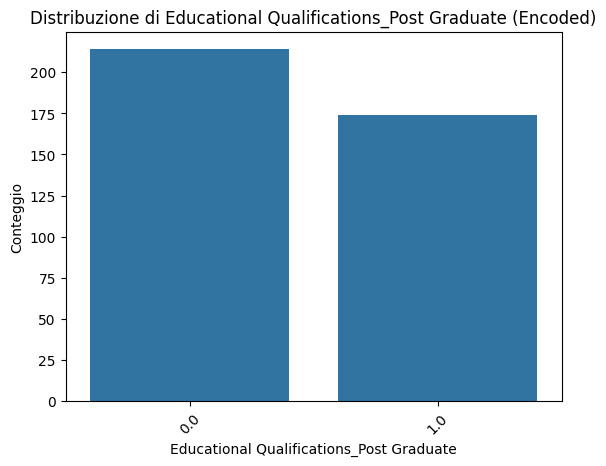

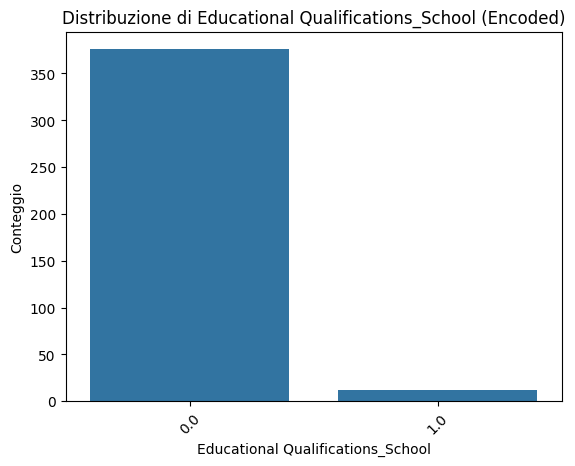

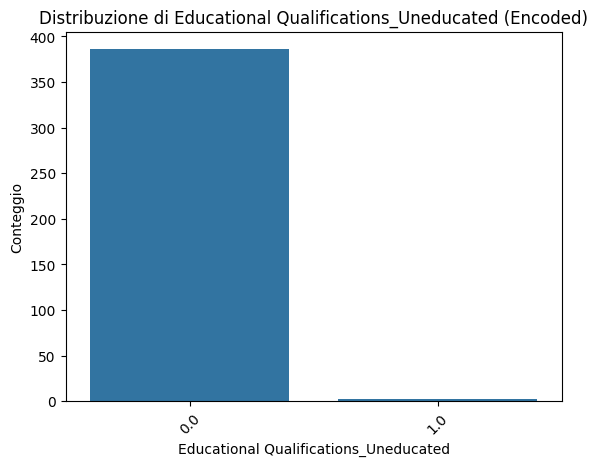

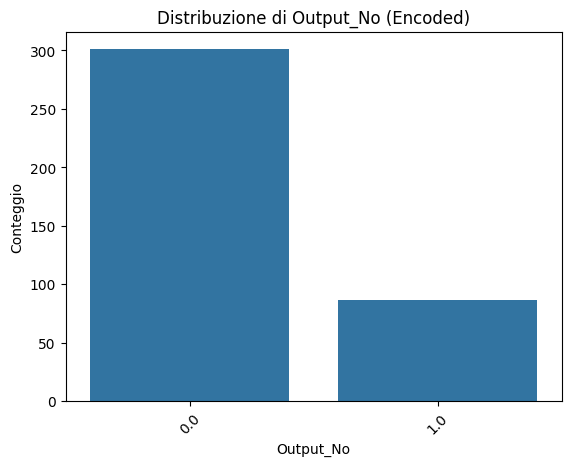

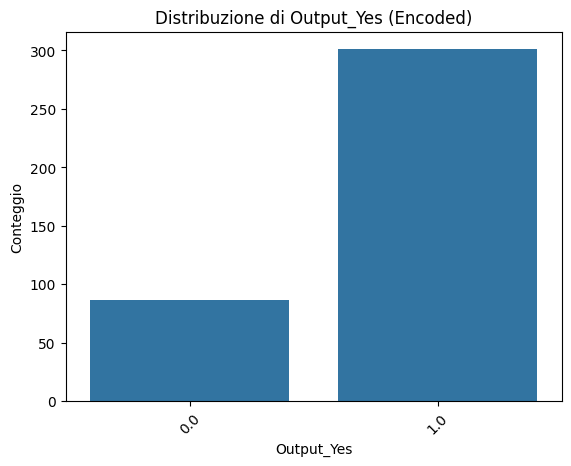

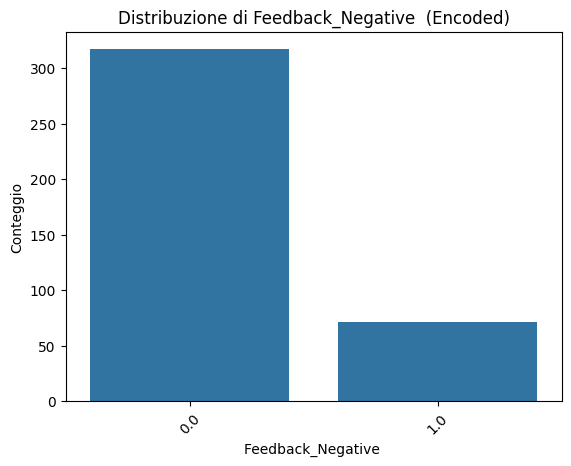

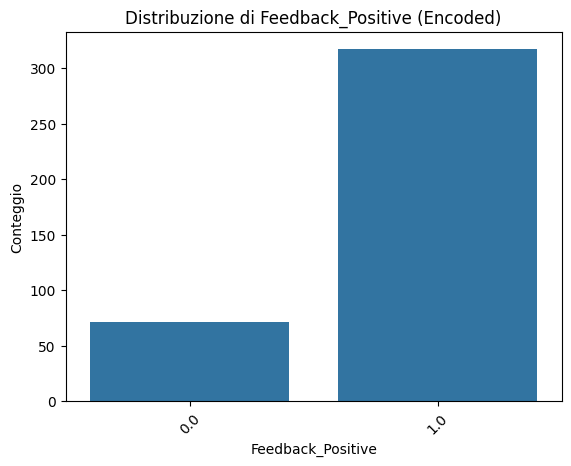

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assume che tu abbia già applicato lo scaling e l'encoding al DataFrame
# Quindi, abbiamo df2_scaled per le colonne numeriche scalate e df2_encoded per le colonne categoriche codificate

# Visualizzazione delle distribuzioni delle colonne numeriche scalate utilizzando un istogramma per ciascuna colonna
plt.figure(figsize=(12, 8))
for col in df2_scaled.columns:
    sns.histplot(data=df2_scaled, x=col, kde=True, bins=20)
    plt.title(f'Distribuzione di {col} (Scaled)')
    plt.xlabel(col)
    plt.ylabel('Frequenza')
    plt.show()

# Visualizzazione delle distribuzioni delle colonne categoriche codificate utilizzando grafici a barre
plt.figure(figsize=(12, 8))
for col in df2_encoded.columns:
    sns.countplot(data=df2_encoded, x=col)
    plt.title(f'Distribuzione di {col} (Encoded)')
    plt.xlabel(col)
    plt.ylabel('Conteggio')
    plt.xticks(rotation=45)
    plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Definisci la variabile target
target_variable = df1['Feedback']

# Rimuovi la variabile target dal DataFrame codificato
X = df2_encoded
y = target_variable

# Suddivisione dei dati in training e testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inizializza il classificatore Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Addestra il modello sul set di dati di addestramento
rf_classifier.fit(X_train, y_train)

# Effettua le predizioni sul set di dati di test
y_pred = rf_classifier.predict(X_test)

# Valuta le prestazioni del modello
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Visualizza l'accuratezza e il report di classificazione
print("Accuratezza del modello:", accuracy)
print("\nReport di classificazione:\n", classification_rep)


Accuratezza del modello: 1.0

Report di classificazione:
               precision    recall  f1-score   support

   Negative        1.00      1.00      1.00        11
    Positive       1.00      1.00      1.00        67

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



In [21]:
# Prendi una riga casuale dal dataset di test
sample_row = X_test.sample(n=1, random_state=42)

# Utilizza il modello addestrato per prevedere la variabile target per il dato di input
predicted_class = rf_classifier.predict(sample_row)

# Visualizza la riga e la previsione del modello
print("Riga di input:")
print(sample_row)
print("\nPrevisto:", predicted_class)

Riga di input:
     Gender_Female  Gender_Male  Marital Status_Married  \
296            0.0          1.0                     0.0   

     Marital Status_Prefer not to say  Marital Status_Single  \
296                               0.0                    1.0   

     Occupation_Employee  Occupation_House wife  Occupation_Self Employeed  \
296                  0.0                    0.0                        0.0   

     Occupation_Student  Monthly Income_10001 to 25000  ...  \
296                 1.0                            0.0  ...   

     Monthly Income_No Income  Educational Qualifications_Graduate  \
296                       1.0                                  0.0   

     Educational Qualifications_Ph.D  \
296                              0.0   

     Educational Qualifications_Post Graduate  \
296                                       1.0   

     Educational Qualifications_School  Educational Qualifications_Uneducated  \
296                                0.0             